O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

In [3]:
from sklearn.model_selection import KFold,train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [14]:
xtrain.shape,ytest.shape

((55000, 784), (15000,))

In [15]:
ytrain=np.where(ytrain%2==0,1,0)
ytest=np.where(ytest%2==0,1,0)

In [16]:
ytrain[:50]
ytest[:50]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1])

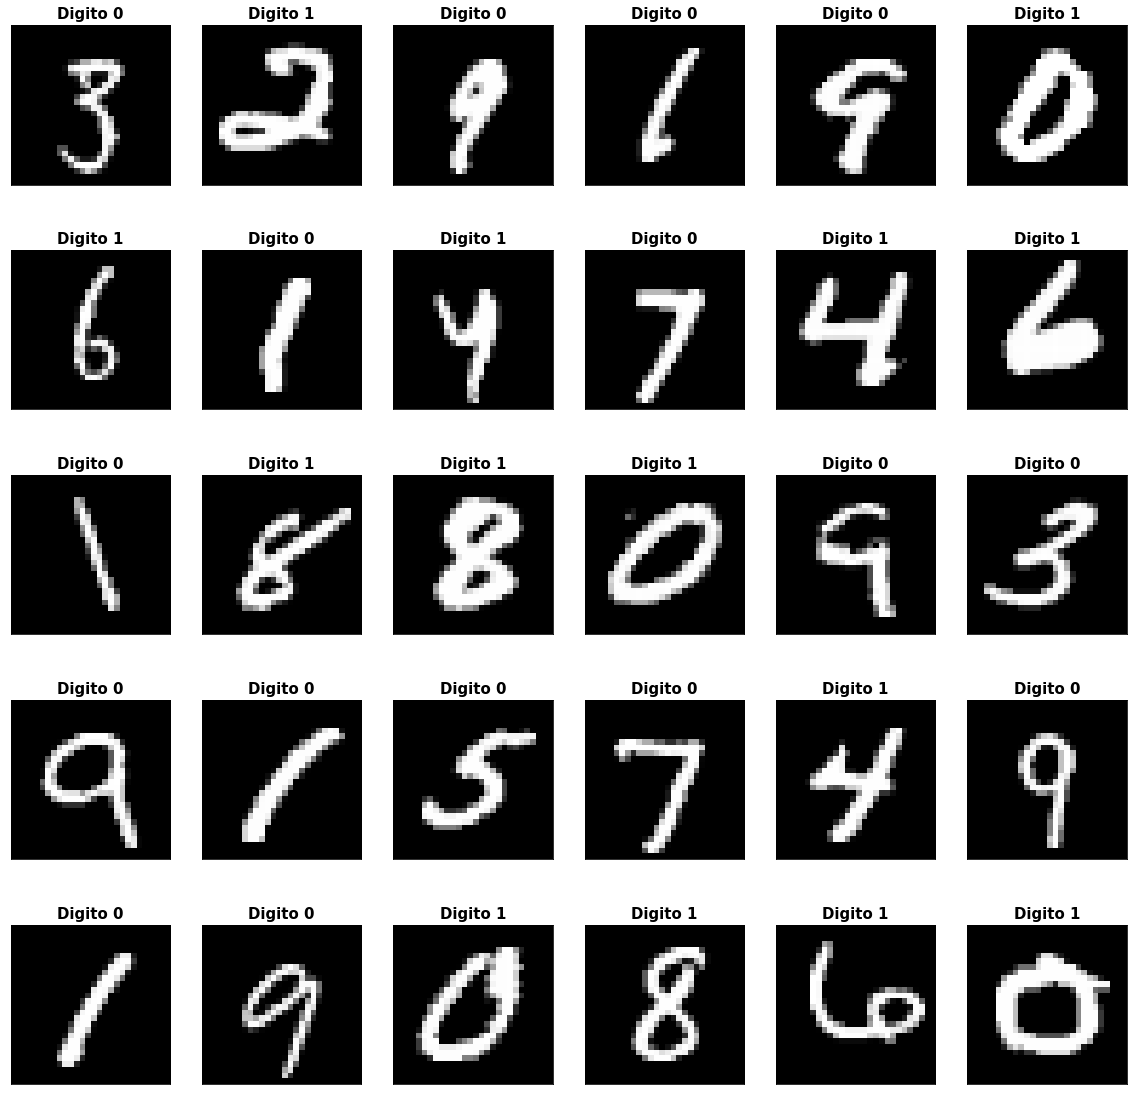

In [17]:
plt.figure(figsize=[20,20])
idx_al=np.random.randint(0,xtrain.shape[0],size=30)

for i in range(len(idx_al)):
    x_val=xtrain[idx_al[i],:].reshape(28,28)
    y_val=ytrain[idx_al[i]]
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_val,cmap=plt.cm.Greys_r)
    plt.title("Digito "+str(int(y_val)),fontsize=15,fontweight="bold")

Abaixo, transformamos nossa variável target para assumir 2 valores apenas:

    - 1 se o dígito for par;
    
    - 0 se o dígito não for ímpar;

### Iniciaremos a plotagem da curva ROC e da AUC

### Regreção Logistica

In [18]:
rl=LogisticRegression()

In [19]:
rl.fit(xtrain,ytrain)

C:\Users\atmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

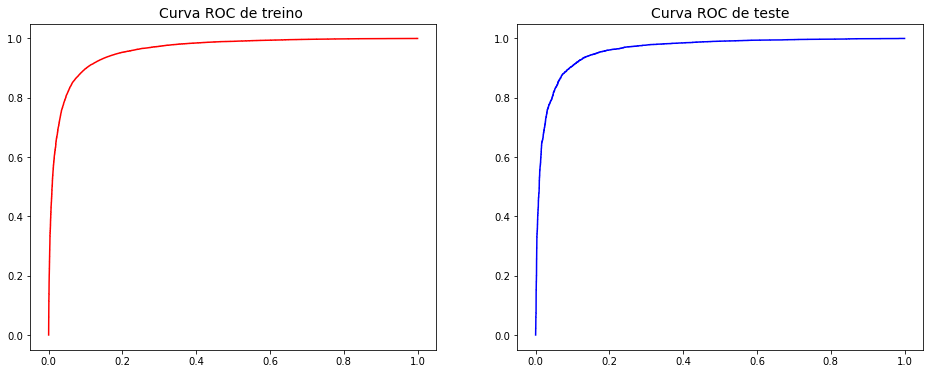

A AUC para dados de treino foi de:  0.9598208677912571
A AUC para dados de teste foi de:  0.9623707536577213


In [20]:
rltrain_pred=rl.predict_proba(xtrain)[:,1]
rlteste_pred=rl.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,rltrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,rlteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,rltrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,rlteste_pred))



In [36]:
rl2=LogisticRegression(penalty='l2')

In [37]:
rl2.fit(xtrain,ytrain)

C:\Users\atmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

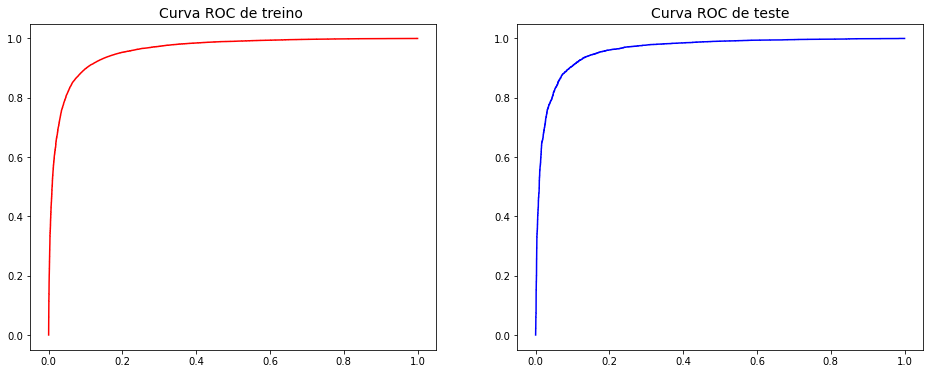

A AUC para dados de treino foi de:  0.9598208677912571
A AUC para dados de teste foi de:  0.9623707536577213


In [38]:
rltrain_pred=rl2.predict_proba(xtrain)[:,1]
rlteste_pred=rl2.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,rltrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,rlteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,rltrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,rlteste_pred))

### KNN

In [39]:
knn=KNeighborsClassifier()

In [40]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

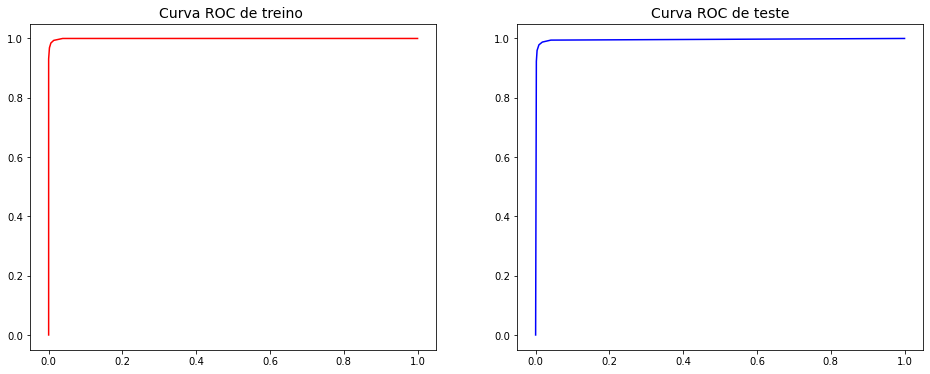

A AUC para dados de treino foi de:  0.999637793959668
A AUC para dados de teste foi de:  0.9956464960868432


In [41]:
knntrain_pred=knn.predict_proba(xtrain)[:,1]
knnteste_pred=knn.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [42]:
knn5=KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [43]:
knn5.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
knntrain_pred=knn5.predict_proba(xtrain)[:,1]
knnteste_pred=knn5.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5d=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
knn5d.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5d.predict_proba(xtrain)[:,1]
knnteste_pred=knn5d.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5ub=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree')

In [ ]:
knn5ub.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5ub.predict_proba(xtrain)[:,1]
knnteste_pred=knn5ub.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5dbt=KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree')

In [ ]:
knn5dbt.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5dbt.predict_proba(xtrain)[:,1]
knnteste_pred=knn5dbt.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5uk=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')

In [ ]:
knn5uk.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5uk.predict_proba(xtrain)[:,1]
knnteste_pred=knn5uk.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5dk=KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')

In [ ]:
knn5dk.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5dk.predict_proba(xtrain)[:,1]
knnteste_pred=knn5dk.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5ub=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')

In [ ]:
knn5ub.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5dk.predict_proba(xtrain)[:,1]
knnteste_pred=knn5dk.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

In [ ]:
knn5dbr=KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')

In [ ]:
knn5dbr.fit(xtrain,ytrain)

In [ ]:
knntrain_pred=knn5dbr.predict_proba(xtrain)[:,1]
knnteste_pred=knn5dbr.predict_proba(xtest)[:,1]

fpr,vpr,the=roc_curve(ytrain,knntrain_pred)
fpr1,vpr1,the1=roc_curve(ytest,knnteste_pred)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(fpr,vpr,c="red")
plt.title("Curva ROC de treino ",fontsize=14)
plt.subplot(1,2,2)
plt.plot(fpr1,vpr1,c="blue")
plt.title("Curva ROC de teste",fontsize=14)
plt.show()

print("A AUC para dados de treino foi de: ", roc_auc_score(ytrain,knntrain_pred))

print("A AUC para dados de teste foi de: ", roc_auc_score(ytest,knnteste_pred))

### Introdução da validação cruzada manual

In [ ]:
kf=KFold(n_splits=5)

In [ ]:
def validacao_cruzada_manual(classificador,x,y,num_folds,metrica):
    kf=KFold(n_splits=num_folds)
    metrica_train=[]
    metrica_test=[]
    plt.figure(figsize=[20,15])
    for train_idx,test_idx in kf.split(x,y):
        xtrain_folds=x[train_idx]
        ytrain_folds=y[train_idx]
        xtest_folds=x[test_idx]
        ytest_folds=y[test_idx]
        
        reg=classificador.fit(xtrain_folds,ytrain_folds)
        pred_train=reg.predict(xtrain_folds)
        pred_test=reg.predict(xtest_folds)
        metrica_train.append(metrica(ytrain_folds,pred_train))
        metrica_test.append(metrica(ytest_folds,pred_test))
    print("A média da métrica solicitada nos dados de treino foi de:   ",np.mean(metrica_train))    
    print("A média da métrica solicitada nos dados de teste foi de:   ",np.mean(metrica_test))

In [ ]:
validacao_cruzada_manual(LogisticRegression(),xtrain,ytrain,5,f1_score)